In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import re
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

df = pd.read_csv("IMDB_ManyRatings_Dataset.csv") #read csv

In [2]:
# Data View:
pd.options.display.max_columns = df.shape[1] # Full view of df
df.describe(include='all')

,Rank,Movie_name,URL,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Censor_Board_Rating,Movie_Length,Genre_1,Genre_2,Genre_3,Genre_4,Release_Date,Story_Summary,Director,Writer_1,Writer_2,Writer_3,Star_1,Star_2,Star_3,Star_4,Star_5,Plot_Keywords,Budget,Gross_USA,Cum_Worldwide_Gross,Production_Company
count,1460.000000,1459,1460,1460,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1416,1452,1456,1460
unique,NaN,1449,1460,35,NaN,137,1455,9,112,14,20,19,1,1177,1456,631,1173,982,29,541,840,1016,1,1,1456,213,1448,1452,1268
top,NaN,Boyz n the Hood,https://www.imdb.com/title/tt0454876/,1991,NaN,64,"173,999",R,1h 47min,Action,Adventure,,,24 May 1991 (USA),A young street hustler attempts to escape the ...,Steven Spielberg,Quentin Tarantino,,,Johnny Depp,Samuel L. Jackson,Morgan Freeman,,,1990s|african american family|ghetto|single mo...,"$30,000,000(estimated)","$27,912,072","$390,493,908",Paramount Pictures
freq,NaN,2,1,52,NaN,43,2,564,38,550,342,381,1460,4,2,18,8,325,986,28,10,10,1460,1460,2,59,2,2,13
mean,730.500000,NaN,NaN,NaN,6.947945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,421.610009,NaN,NaN,NaN,0.791769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,365.750000,NaN,NaN,NaN,6.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,730.500000,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1095.250000,NaN,NaN,NaN,7.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head(50)

,Rank,Movie_name,URL,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Censor_Board_Rating,Movie_Length,Genre_1,Genre_2,Genre_3,Genre_4,Release_Date,Story_Summary,Director,Writer_1,Writer_2,Writer_3,Star_1,Star_2,Star_3,Star_4,Star_5,Plot_Keywords,Budget,Gross_USA,Cum_Worldwide_Gross,Production_Company
0,1,Goodfellas,https://www.imdb.com/title/tt0099685/,1990,8.7,90,"983,254",16,2h 26min,Biography,Crime,Drama,,21 September 1990 (USA),"The story ofHenry Hilland his life in the mob,...",Martin Scorsese,Nicholas Pileggi(book),Nicholas Pileggi(screenplay),,Robert De Niro,Ray Liotta,Joe Pesci,,,gangster|organized crime|sadistic psychopath|m...,"$25,000,000(estimated)","$46,836,214","$46,879,633",Warner Bros.
1,2,Home Alone,https://www.imdb.com/title/tt0099785/,1990,7.6,63,"448,940",Not Rated,1h 43min,Comedy,Family,,,15 March 1991 (Israel),An eight-year-old troublemaker must protect hi...,Chris Columbus,John Hughes,,,Macaulay Culkin,Joe Pesci,Daniel Stern,,,christmas|home alone|burglary|child protagonis...,"$18,000,000(estimated)","$285,761,243","$477,063,114","Hughes Entertainment,Twentieth Century Fox"
2,3,Edward Scissorhands,https://www.imdb.com/title/tt0099487/,1990,7.9,74,"435,025",PG,1h 45min,Drama,Fantasy,Romance,,14 December 1990 (USA),"An artificial man, who was incompletely constr...",Tim Burton,Tim Burton(story),Caroline Thompson(story),,Johnny Depp,Winona Ryder,Dianne Wiest,,,scissors|compassion|surrealism|waterbed|love,"$20,000,000(estimated)","$56,362,352","$86,024,005",Twentieth Century Fox
3,4,Back to the Future Part III,https://www.imdb.com/title/tt0099088/,1990,7.4,55,"389,988",Not Rated,1h 58min,Adventure,Comedy,Sci-Fi,,20 July 1990 (Israel),"Stranded in 1955, Marty McFly learns about the...",Robert Zemeckis,Robert Zemeckis(characters),Bob Gale(characters),3 more credits»,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,,,year 1955|year 1885|woman|purple dress|girl ne...,"$40,000,000(estimated)","$88,277,583","$249,130,916","Universal Pictures,Amblin Entertainment,U-Driv..."
4,5,The Godfather: Part III,https://www.imdb.com/title/tt0099674/,1990,7.6,60,"347,836",PG,2h 42min,Crime,Drama,,,25 December 1990 (USA),In the midst of trying to legitimize his busin...,Francis Ford Coppola,Mario Puzo,Francis Ford Coppola,,Al Pacino,Diane Keaton,Andy Garcia,,,opera|vatican|italy|gangster|catholic church,"$54,000,000(estimated)","$66,666,062","$136,766,062","Paramount Pictures,Zoetrope Studios"
5,6,Die Hard 2,https://www.imdb.com/title/tt0099423/,1990,7.2,67,"328,109",Not Rated,2h 4min,Action,Thriller,,,3 July 1990 (USA),John McClane attempts to avert disaster as rog...,Renny Harlin,Walter Wager(novel),Steven E. de Souza(screenplay),,Bruce Willis,William Atherton,Bonnie Bedelia,,,john mcclane character|opening action scene|br...,"$70,000,000(estimated)","$117,540,947","$240,247,433","Twentieth Century Fox,Gordon Company,Silver Pi..."
6,7,Total Recall,https://www.imdb.com/title/tt0100802/,1990,7.5,57,"292,943",Not Rated,1h 53min,Action,Sci-Fi,Thriller,,1 June 1990 (USA),When a man goes for virtual vacation memories ...,Paul Verhoeven,"Philip K. Dick(short story ""We Can Remember It...",Ronald Shusett(screen story),5 more credits»,Arnold Schwarzenegger,Sharon Stone,Michael Ironside,,,implanted memory|false memory|space colony|amb...,"$65,000,000(estimated)","$119,412,921","$261,317,921","Carolco Pictures,Carolco International N.V."
7,8,Pretty Woman,https://www.imdb.com/title/tt0100405/,1990,7.0,51,"279,427",R,1h 59min,Comedy,Romance,,,6 July 1990 (Israel),A man in a legal but hurtful business needs an...,Garry Marshall,J.F. Lawton,,,Richard Gere,Julia Roberts,Jason Alexander,,,hotel|falling in love with a prostitute|prosti...,"$14,000,000(estimated)","$178,406,268","$463,406,268","Touchstone Pictures,Silver Screen Partners IV"
8,9,Dances with Wolves,https://www.imdb.com/title/tt0099348/,1990,8.0,72,"233,633",Not Rated,3h 1min,Adventure,Drama,Western,,22 March 1991 (Israel),"Lieutenant John Dunbar, assigned to a remote w...",Kev

In [4]:
df.dtypes

Rank                     int64
Movie_name              object
URL                     object
Release_Year            object
IMDB_Rating            float64
Metascore               object
Reviewer_count          object
Censor_Board_Rating     object
Movie_Length            object
Genre_1                 object
Genre_2                 object
Genre_3                 object
Genre_4                 object
Release_Date            object
Story_Summary           object
Director                object
Writer_1                object
Writer_2                object
Writer_3                object
Star_1                  object
Star_2                  object
Star_3                  object
Star_4                  object
Star_5                  object
Plot_Keywords           object
Budget                  object
Gross_USA               object
Cum_Worldwide_Gross     object
Production_Company      object
dtype: object

In [5]:
# To Do A:
#  Release_Year - Drop corrupted columns
#  Metascore - Clean
#  Reviewer_count - Clean
#  Movie_Length - Conevert to minutes
#  Release_Date - Extract month
#  Plot_Keywords - Tokenize
#  Budget - Clean
#  Gross_USA - Clean
#  Cum_Worldwide_Gross - Clean
#  Drop Irrelevant Columns
#  Remove Duplications

# To Do B:
# Find and Clean Outliers

# Part A

In [6]:
# Release_Year - Drop corrupted columns
indexNames = df[ df['Release_Year'] == 'The Unexpected Virtue of Ignorance'].index
df.drop(indexNames , inplace=True)
indexNames = df[ df['Release_Year'].astype('int64') <1990].index
df.drop(indexNames , inplace=True)
df['Release_Year']=df['Release_Year'].astype('int64')

In [7]:
# Metascore - Clean
df['Metascore'] = np.where(df['Metascore'].str.isdigit(), df['Metascore'], np.nan)
df['Metascore'] = df['Metascore'].astype('float64')

In [8]:
# Reviewer_count - Clean
df['Reviewer_count'] = df['Reviewer_count'].str.replace(r'[^\d-]+','')
df['Reviewer_count'] = df['Reviewer_count'].str.replace('$','')
df['Reviewer_count'] = df['Reviewer_count'].str.replace(',','')
df['Reviewer_count']=df['Reviewer_count'].astype('int64')

In [9]:
# Movie_Length - Conevert to minutes
df['Movie_Length'] = df['Movie_Length'].str.replace('h',',')
df['Movie_Length'] = df['Movie_Length'].str.replace('min','')
df[['hours','min']] = df.Movie_Length.str.split(",",expand=True) 
df['min'].mask(df['min'] == '', 0, inplace=True)
df['hours'] = df['hours'].astype('int64')
df['min'] = df['min'].astype('int64')
df['hours'] = df['hours'].apply(lambda x: x*60)
df['Length_in_minutes'] = df['hours'] + df['min']
df.drop('hours', axis=1, inplace=True)
df.drop('min', axis=1, inplace=True)
df.drop('Movie_Length', axis=1, inplace=True)

In [10]:
# Release_Date - Extract month
df[['Release_Date_Clean','Nation']] = df.Release_Date.str.split("(",expand=True)
df['Release_Month'] = pd.DatetimeIndex(df['Release_Date_Clean']).month
df=df.drop(columns=['Nation','Release_Date','Release_Date_Clean'])

In [11]:
# Budget - Clean
df['Budget'] = df['Budget'].str.replace(r'[^\d-]+','')
df['Budget'] = df['Budget'].str.replace('$','')
df['Budget'] = df['Budget'].str.replace(',','')
df['Budget'] = df['Budget'].astype('float64')

In [12]:
# Gross_USA - Clean
df['Gross_USA'] = df['Gross_USA'].str.replace(r'[^\d-]+','')
df['Gross_USA'] = df['Gross_USA'].str.replace('$','')
df['Gross_USA'] = df['Gross_USA'].str.replace(',','')
df['Gross_USA'] = df['Gross_USA'].astype('float64')

In [13]:
# Cum_Worldwide_Gross - Clean
df['Cum_Worldwide_Gross'] = df['Cum_Worldwide_Gross'].str.replace(r'[^\d-]+','')
df['Cum_Worldwide_Gross'] = df['Cum_Worldwide_Gross'].str.replace('$','')
df['Cum_Worldwide_Gross'] = df['Cum_Worldwide_Gross'].str.replace(',','')
df['Cum_Worldwide_Gross'] = df['Cum_Worldwide_Gross'].astype('float64')

In [14]:
# Drop Irrelevant Columns
df=df.drop(columns=['Genre_4','Writer_3','Star_4','Star_5','URL','Rank','Story_Summary'])

In [15]:
# Duplications:
df=df.drop_duplicates(subset=["Movie_name","Release_Year"])

In [16]:
df.describe()

,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Budget,Gross_USA,Cum_Worldwide_Gross,Length_in_minutes,Release_Month
count,1450.000000,1450.000000,1395.000000,1.450000e+03,1.407000e+03,1.443000e+03,1.446000e+03,1450.000000,1450.000000
mean,2003.957241,6.944207,60.854480,2.704524e+05,6.521775e+07,1.035221e+08,2.440798e+08,115.777241,6.629655
std,8.371356,0.792109,15.833275,2.500538e+05,5.664646e+07,9.967534e+07,2.742441e+08,20.168494,3.480015
min,1990.000000,3.600000,11.000000,4.876000e+03,1.500000e+04,3.047100e+04,3.047100e+04,75.000000,1.000000
25%,1997.000000,6.400000,49.000000,1.219235e+05,2.500000e+07,3.939946e+07,6.566364e+07,101.000000,3.000000
50%,2004.000000,7.000000,61.000000,2.010285e+05,4.800000e+07,7.175680e+07,1.601456e+08,113.000000,7.000000
75%,2011.000000,7.500000,72.000000,3.300858e+05,9.000000e+07,1.340497e+08,3.093973e+08,128.000000,10.000000
max,2018.000000,9.300000,100.000000,2.260003e+06,3.210000e+08,9.366622e+08,2.790439e+09,202.000000,12.000000


# Part B

In [17]:
# Categorial data describe
df.describe(include = ['O'])

,Movie_name,Censor_Board_Rating,Genre_1,Genre_2,Genre_3,Director,Writer_1,Writer_2,Star_1,Star_2,Star_3,Plot_Keywords,Production_Company
count,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450
unique,1444,9,13,20,19,629,1168,978,538,838,1012,1450,1263
top,Godzilla,R,Action,Adventure,,Steven Spielberg,Quentin Tarantino,,Johnny Depp,Samuel L. Jackson,Morgan Freeman,bodybuilder|kidnapping|based on true story|fem...,Paramount Pictures
freq,2,561,547,341,375,18,8,322,28,10,10,1,13


In [18]:
# Numeric data describe
df.describe(include = [np.number])

,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Budget,Gross_USA,Cum_Worldwide_Gross,Length_in_minutes,Release_Month
count,1450.000000,1450.000000,1395.000000,1.450000e+03,1.407000e+03,1.443000e+03,1.446000e+03,1450.000000,1450.000000
mean,2003.957241,6.944207,60.854480,2.704524e+05,6.521775e+07,1.035221e+08,2.440798e+08,115.777241,6.629655
std,8.371356,0.792109,15.833275,2.500538e+05,5.664646e+07,9.967534e+07,2.742441e+08,20.168494,3.480015
min,1990.000000,3.600000,11.000000,4.876000e+03,1.500000e+04,3.047100e+04,3.047100e+04,75.000000,1.000000
25%,1997.000000,6.400000,49.000000,1.219235e+05,2.500000e+07,3.939946e+07,6.566364e+07,101.000000,3.000000
50%,2004.000000,7.000000,61.000000,2.010285e+05,4.800000e+07,7.175680e+07,1.601456e+08,113.000000,7.000000
75%,2011.000000,7.500000,72.000000,3.300858e+05,9.000000e+07,1.340497e+08,3.093973e+08,128.000000,10.000000
max,2018.000000,9.300000,100.000000,2.260003e+06,3.210000e+08,9.366622e+08,2.790439e+09,202.000000,12.000000


D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


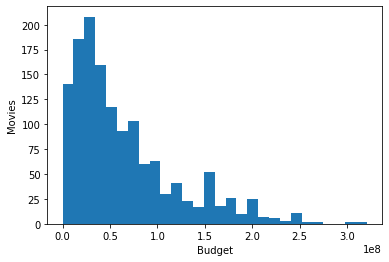

In [19]:
plt.hist(df['Budget'], bins = 'auto') # Budget Plot
plt.xlabel("Budget")
plt.ylabel("Movies")
plt.show()

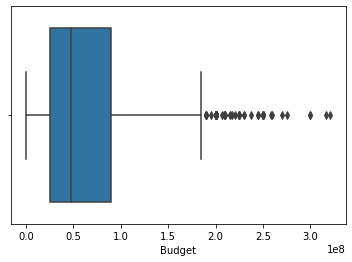

In [20]:
sns.boxplot(df.Budget)

In [21]:
print("Budget too high: ",df['Budget'][df['Budget']>4e8].count()) # Budget Outliers
print("Budget too low: ",df['Budget'][df['Budget']<1e6].count()) 

df.loc[df.Budget > 4e8, 'Budget']= np.nan
df.loc[df.Budget < 1e6, 'Budget']= np.nan

Budget too high:  0
Budget too low:  10


D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


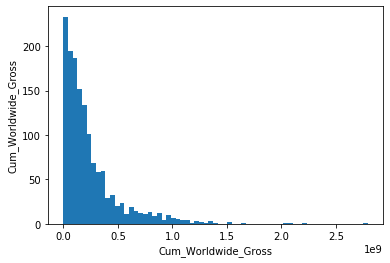

In [22]:
plt.hist(df['Cum_Worldwide_Gross'], bins = 'auto') # Cum_Worldwide_Gross Plot
plt.xlabel("Cum_Worldwide_Gross")
plt.ylabel("Cum_Worldwide_Gross")
plt.show()

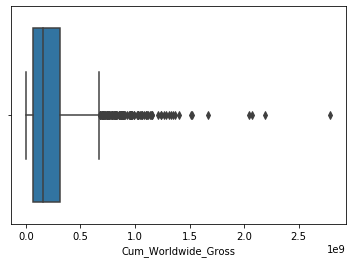

In [23]:
sns.boxplot(df.Cum_Worldwide_Gross)

In [24]:
print("Cum_Worldwide_Gross too high: ",df['Cum_Worldwide_Gross'][df['Cum_Worldwide_Gross']>2.8e9].count()) # Cum_Worldwide_Gross Outliers

df.loc[df.Cum_Worldwide_Gross >2.8e9, 'Cum_Worldwide_Gross']= np.nan

Cum_Worldwide_Gross too high:  0


D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


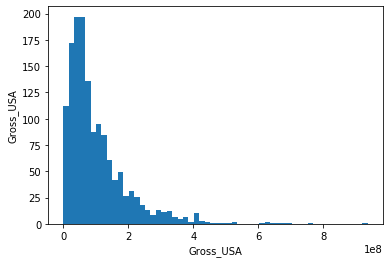

In [25]:
plt.hist(df['Gross_USA'], bins = 'auto') # Gross_USA Plot
plt.xlabel("Gross_USA")
plt.ylabel("Gross_USA")
plt.show()

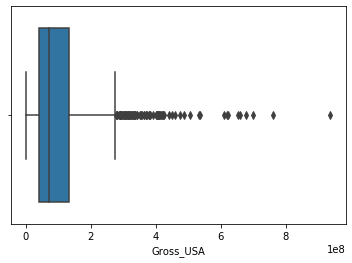

In [26]:
sns.boxplot(df.Gross_USA)

In [27]:
print("Gross_USA too high: ",df['Gross_USA'][df['Gross_USA']>9e8].count()) # Gross_USA Outliers
df.loc[df.Gross_USA >9e8, 'Gross_USA']= np.nan

Gross_USA too high:  1


In [28]:
# Removing rows with nan (Due to high amount of data)
df=df.dropna(subset=["IMDB_Rating","Reviewer_count","Metascore","Budget","Gross_USA","Cum_Worldwide_Gross","Length_in_minutes","Release_Month"],how='any',axis='rows')

In [29]:
df.describe(include='all')

,Movie_name,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Censor_Board_Rating,Genre_1,Genre_2,Genre_3,Director,Writer_1,Writer_2,Star_1,Star_2,Star_3,Plot_Keywords,Budget,Gross_USA,Cum_Worldwide_Gross,Production_Company,Length_in_minutes,Release_Month
count,1354,1354.000000,1354.000000,1354.000000,1.354000e+03,1354,1354,1354,1354,1354,1354,1354,1354,1354,1354,1354,1.354000e+03,1.354000e+03,1.354000e+03,1354,1354.000000,1354.000000
unique,1348,NaN,NaN,NaN,NaN,9,13,20,19,592,1096,924,504,781,949,1354,NaN,NaN,NaN,1184,NaN,NaN
top,Fantastic Four,NaN,NaN,NaN,NaN,PG-13,Action,Adventure,,Steven Spielberg,Quentin Tarantino,,Johnny Depp,Samuel L. Jackson,Morgan Freeman,bodybuilder|kidnapping|based on true story|fem...,NaN,NaN,NaN,Paramount Pictures,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,523,523,328,352,18,7,289,27,9,10,1,NaN,NaN,NaN,13,NaN,NaN
mean,NaN,2004.415066,6.966100,60.781388,2.827752e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.645535e+07,1.075557e+08,2.554950e+08,NaN,116.516248,6.605613
std,NaN,8.219851,0.784454,15.896219,2.528553e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.690060e+07,9.835862e+07,2.740067e+08,NaN,20.268708,3.477453
min,NaN,1990.000000,3.600000,11.000000,2.088400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+06,3.047100e+04,3.047100e+04,NaN,76.000000,1.000000
25%,NaN,1998.000000,6.500000,49.000000,1.310452e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000e+07,4.319168e+07,7.897125e+07,NaN,102.000000,3.000000
50%,NaN,2004.000000,7.000000,61.000000,2.117200e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+07,7.620477e+07,1.716738e+08,NaN,114.000000,7.000000
75%,NaN,2012.000000,7.500000,72.000000,3.434645e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.150000e+07,1.387502e+08,3.218525e+08,NaN,129.000000,10.000000


In [30]:
df.to_csv('ManyRatings_Dataset_Cleaned.csv', index=False)